In [1]:
import pandas as pd
import os
from data_preparation import load_data
from tqdm import tqdm
tqdm.pandas()

In [2]:
DATA_FOLDER = "/mnt/d/sign-lang-data/"
#ez = load_data.load_data(DATA_FOLDER, "train.csv")

In [3]:
train = pd.read_csv(os.path.join(DATA_FOLDER,"train.csv"))

In [4]:
train

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [5]:
res = pd.read_parquet(os.path.join(DATA_FOLDER,"train_landmark_files/4718/132875.parquet"), engine='pyarrow')

In [6]:
res

,frame,row_id,type,landmark_index,x,y,z
0,2,2-face-0,face,0,0.568849,0.458078,-0.045442
1,2,2-face-1,face,1,0.553544,0.420910,-0.065209
2,2,2-face-2,face,2,0.553654,0.433180,-0.039494
3,2,2-face-3,face,3,0.541631,0.394081,-0.042482
4,2,2-face-4,face,4,0.553177,0.411433,-0.067053
...,...,...,...,...,...,...,...
3253,7,7-right_hand-16,right_hand,16,0.483145,0.618645,-0.118344
3254,7,7-right_hand-17,right_hand,17,0.286214,0.654441,-0.090772
3255,7,7-right_hand-18,right_hand,18,0.342199,0.651741,-0.112155
3256,7,7-right_hand-19,right_hand,19,0.382268,0.649928,-0.119010


<Axes: xlabel='sign'>

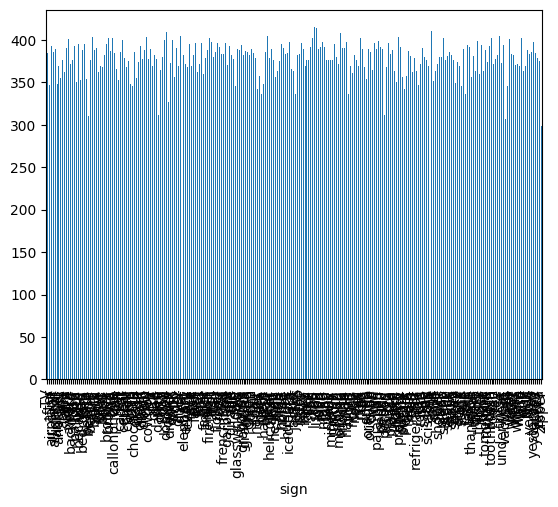

In [7]:
train['sign'].groupby(train['sign']).count().plot(kind='bar')

In [8]:
data_type_res =  res[['type', 'landmark_index']]

In [9]:
nb_frame = res['frame'].max()
nb_frame

7

In [10]:
data_type_res['type'].unique()

array(['face', 'left_hand', 'pose', 'right_hand'], dtype=object)

In [25]:
for t in data_type_res['type'].unique():
    print(data_type_res[data_type_res['type'] == t].max())

type              face
landmark_index     467
dtype: object
type              left_hand
landmark_index           20
dtype: object
type              pose
landmark_index      32
dtype: object
type              right_hand
landmark_index            20
dtype: object


In [12]:
def count_frame(path):
    df = pd.read_parquet(path, engine='pyarrow', columns=['frame'])
    return df['frame'].max()

In [13]:
#train['nb_frame'] = train['path'].progress_apply(lambda x: count_frame(os.path.join(DATA_FOLDER, x)))
train = pd.read_csv(os.path.join(DATA_FOLDER, "train_with_nb_frame.csv"))
#train.to_csv(os.path.join(DATA_FOLDER, "train_with_nb_frame.csv"), index=False)

In [14]:
train['nb_frame']

0         42
1         39
2        207
3         28
4         39
        ... 
94472    112
94473     41
94474     37
94475     42
94476    129
Name: nb_frame, Length: 94477, dtype: int64

In [15]:
train['nb_frame'].mean()

67.36137895995851

In [16]:
train['nb_frame'].min()

1

In [17]:
train['nb_frame'].std()

58.98100923190683

In [18]:
train['nb_frame'].max()

546

<Axes: ylabel='Frequency'>

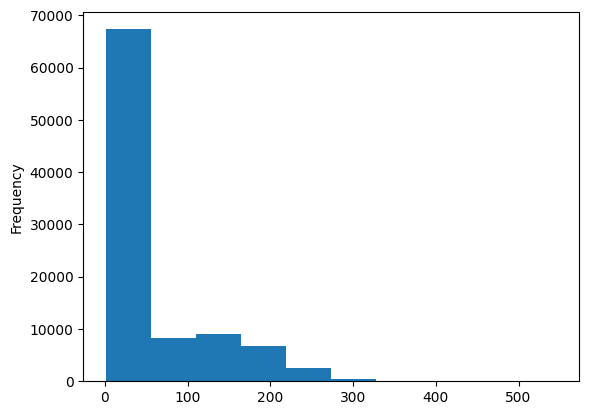

In [19]:
train['nb_frame'].plot(kind='hist')